Q1

In [ ]:
install.packages("faraway") #installing package
library(faraway)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’




In [ ]:
#loading the datasets
data(teengamb)
head(teengamb)

,sex,status,income,verbal,gamble
,<int>,<int>,<dbl>,<int>,<dbl>
1,1,51,2.00,8,0.0
2,1,28,2.50,8,0.0
3,1,37,2.00,6,0.0
4,1,28,7.00,4,7.3
5,1,65,2.00,8,19.6
6,1,61,3.47,6,0.1


In [ ]:
summary(teengamb)

      sex             status          income           verbal     
 Min.   :0.0000   Min.   :18.00   Min.   : 0.600   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00  
 Median :0.0000   Median :43.00   Median : 3.250   Median : 7.00  
 Mean   :0.4043   Mean   :45.23   Mean   : 4.642   Mean   : 6.66  
 3rd Qu.:1.0000   3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00  
 Max.   :1.0000   Max.   :75.00   Max.   :15.000   Max.   :10.00  
     gamble     
 Min.   :  0.0  
 1st Qu.:  1.1  
 Median :  6.0  
 Mean   : 19.3  
 3rd Qu.: 19.4  
 Max.   :156.0  

In [ ]:
# Convert "sex" to a factor for better representation
teengamb$sex <- as.factor(teengamb$sex)

In [ ]:
# Summary statistics by gender by(teengamb, teengamb$sex, summary)
by(teengamb, teengamb$sex, summary)

teengamb$sex: 0
 sex        status          income           verbal           gamble       
 0:28   Min.   :18.00   Min.   : 0.600   Min.   : 1.000   Min.   :  0.000  
 1: 0   1st Qu.:38.00   1st Qu.: 2.000   1st Qu.: 6.000   1st Qu.:  2.775  
        Median :51.00   Median : 3.375   Median : 7.000   Median : 14.250  
        Mean   :52.00   Mean   : 4.976   Mean   : 6.821   Mean   : 29.775  
        3rd Qu.:65.25   3rd Qu.: 6.625   3rd Qu.: 8.250   3rd Qu.: 42.175  
        Max.   :75.00   Max.   :15.000   Max.   :10.000   Max.   :156.000  
------------------------------------------------------------ 
teengamb$sex: 1
 sex        status          income           verbal          gamble      
 0: 0   Min.   :18.00   Min.   : 1.500   Min.   :4.000   Min.   : 0.000  
 1:19   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.:6.000   1st Qu.: 0.100  
        Median :30.00   Median : 3.000   Median :6.000   Median : 1.700  
        Mean   :35.26   Mean   : 4.149   Mean   :6.421   Mean   : 3.866  
    

In [ ]:
cor(teengamb[,-which(names(teengamb) == "sex")])

,status,income,verbal,gamble
status,1.00000000,-0.2750340,0.5316102,-0.05042081
income,-0.27503402,1.0000000,-0.1755707,0.62207690
verbal,0.53161022,-0.1755707,1.0000000,-0.22005619
gamble,-0.05042081,0.6220769,-0.2200562,1.00000000


for male  = 0 and female = 1

In [ ]:
cor(teengamb[teengamb$sex == "1", -which(names(teengamb) == "sex")])

,status,income,verbal,gamble
status,1.0000000,-0.4870717,0.33460676,0.36090977
income,-0.4870717,1.0000000,-0.21463814,0.08823560
verbal,0.3346068,-0.2146381,1.00000000,0.07068478
gamble,0.3609098,0.0882356,0.07068478,1.00000000


In [ ]:
cor(teengamb[teengamb$sex == "0", -which(names(teengamb) == "sex")])

,status,income,verbal,gamble
status,1.0000000,-0.3454141,0.6296585,-0.3997019
income,-0.3454141,1.0000000,-0.1837980,0.7136690
verbal,0.6296585,-0.1837980,1.0000000,-0.3325610
gamble,-0.3997019,0.7136690,-0.3325610,1.0000000


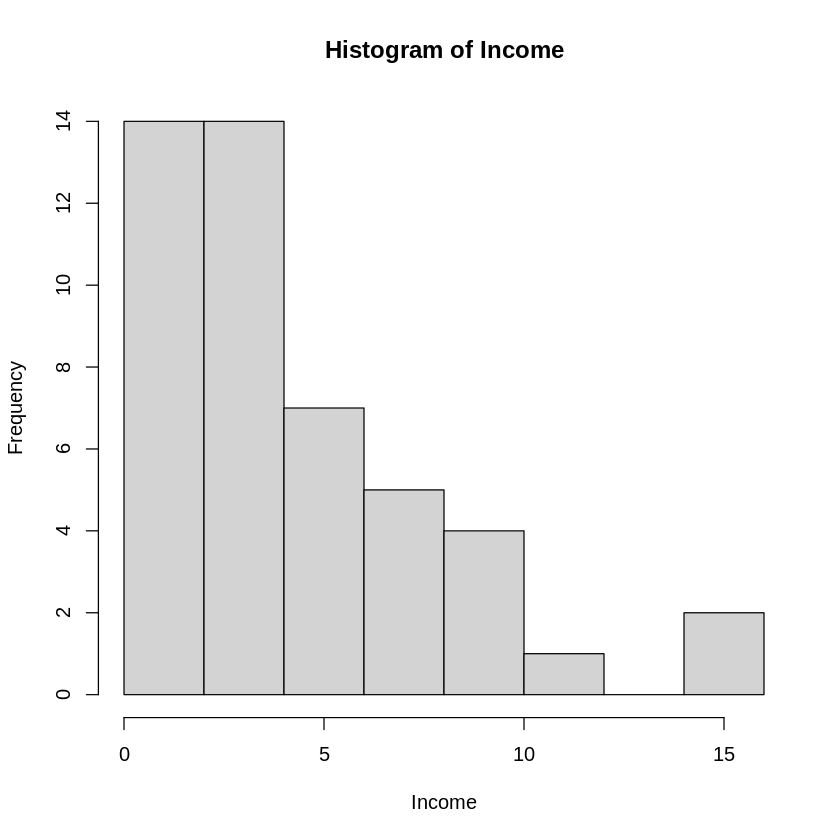

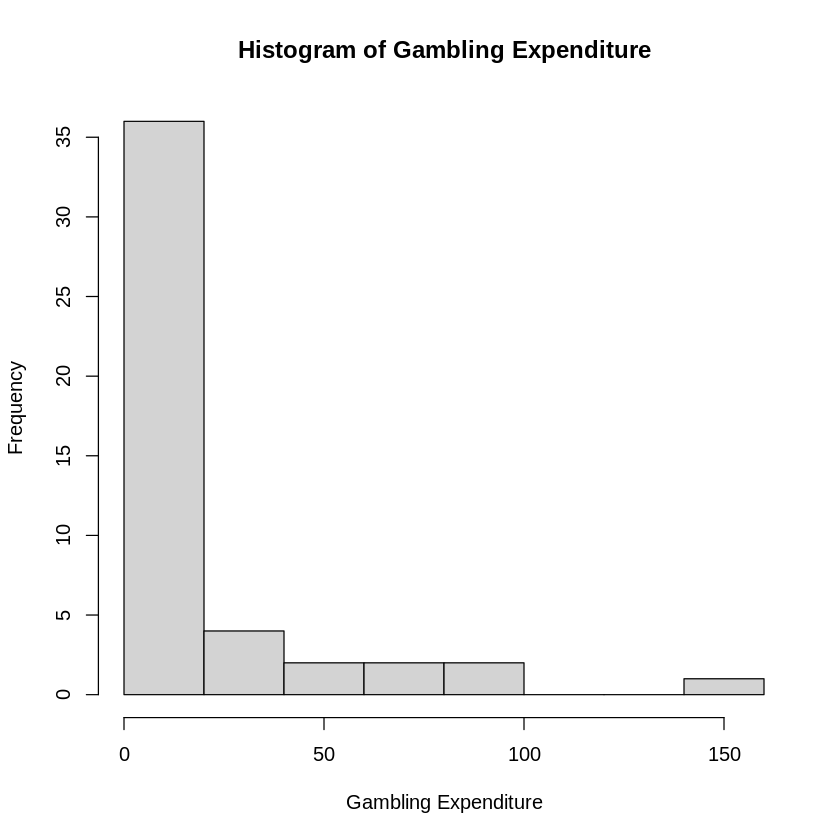

In [ ]:
hist(teengamb$income, main="Histogram of Income", xlab="Income")
hist(teengamb$gamble, main="Histogram of Gambling Expenditure", xlab="Gambling Expenditure")

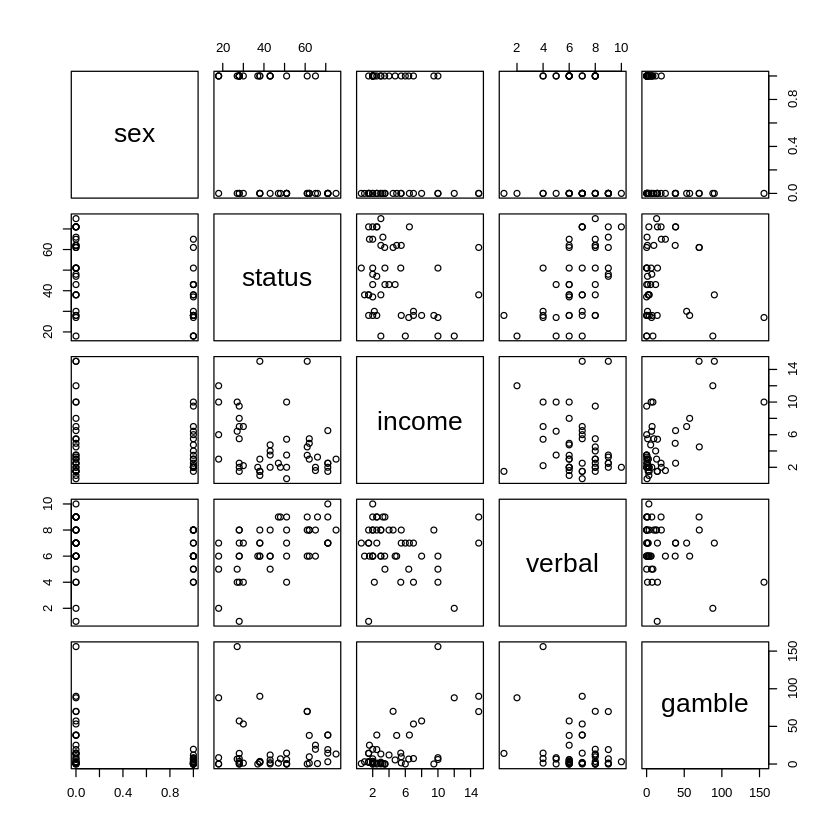

In [ ]:
pairs(teengamb)

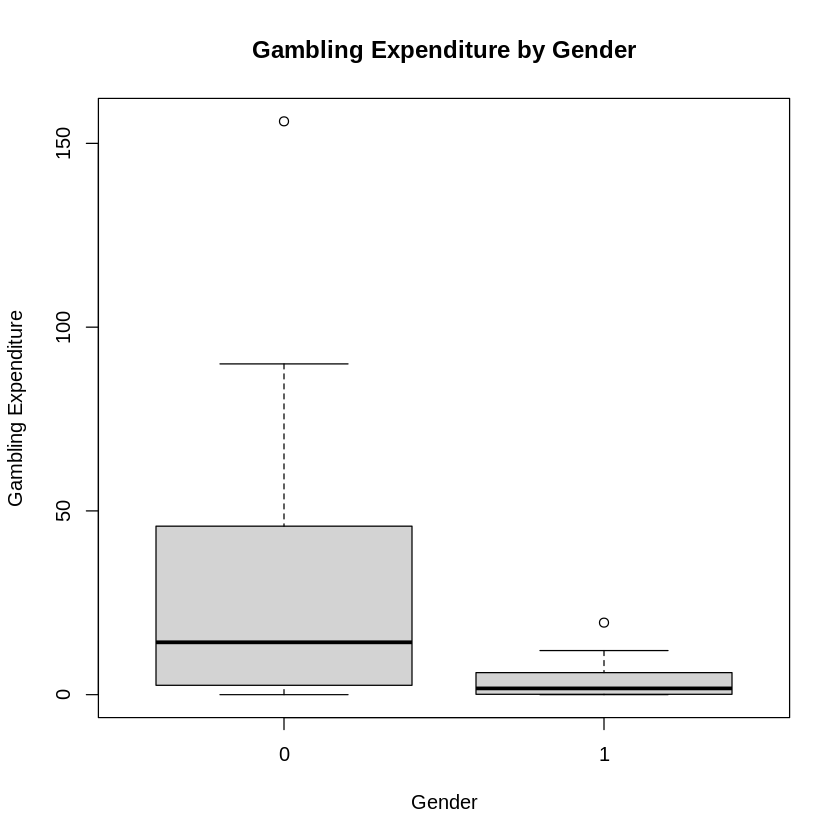

In [ ]:
boxplot(teengamb$gamble ~ teengamb$sex, main="Gambling Expenditure by Gender", xlab="Gender", ylab="Gambling Expenditure")

Q2

In [ ]:
install.packages("faraway")
install.packages("ggplot2")
install.packages("dplyr")

library(faraway)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data(prostate)
head(prostate)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,-0.5798185,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
2,-0.9942523,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
3,-0.5108256,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
4,-1.2039728,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
5,0.7514161,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156
6,-1.0498221,3.2288,50,-1.386294,0,-1.38629,6,0,0.76547


In [ ]:
summary(prostate)

     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

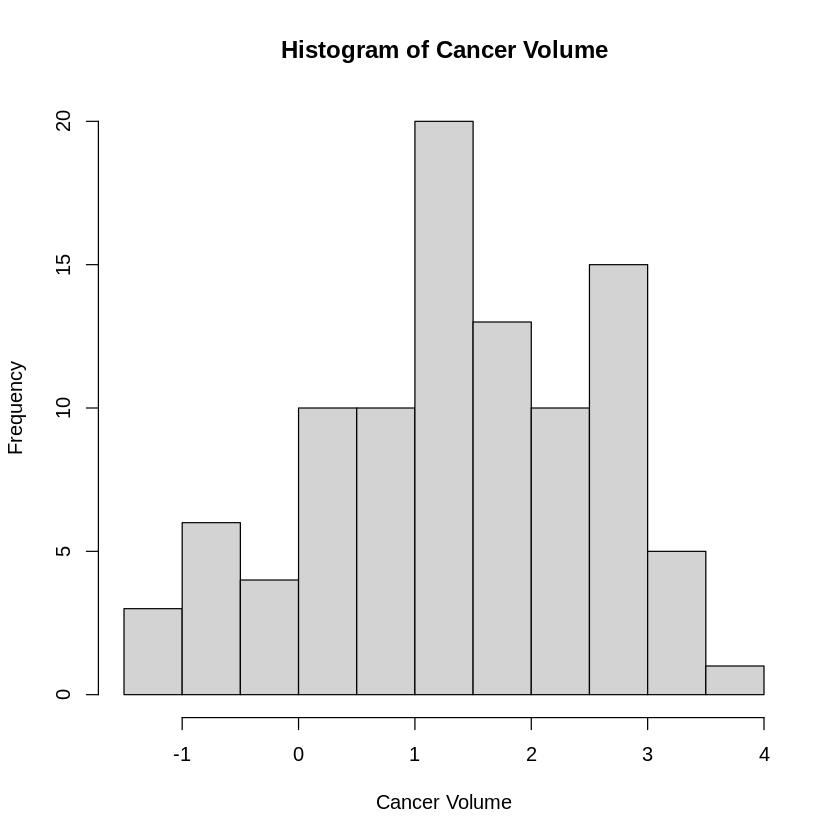

In [ ]:
hist(prostate$lcavol, xlab = "Cancer Volume", main = "Histogram of Cancer Volume")


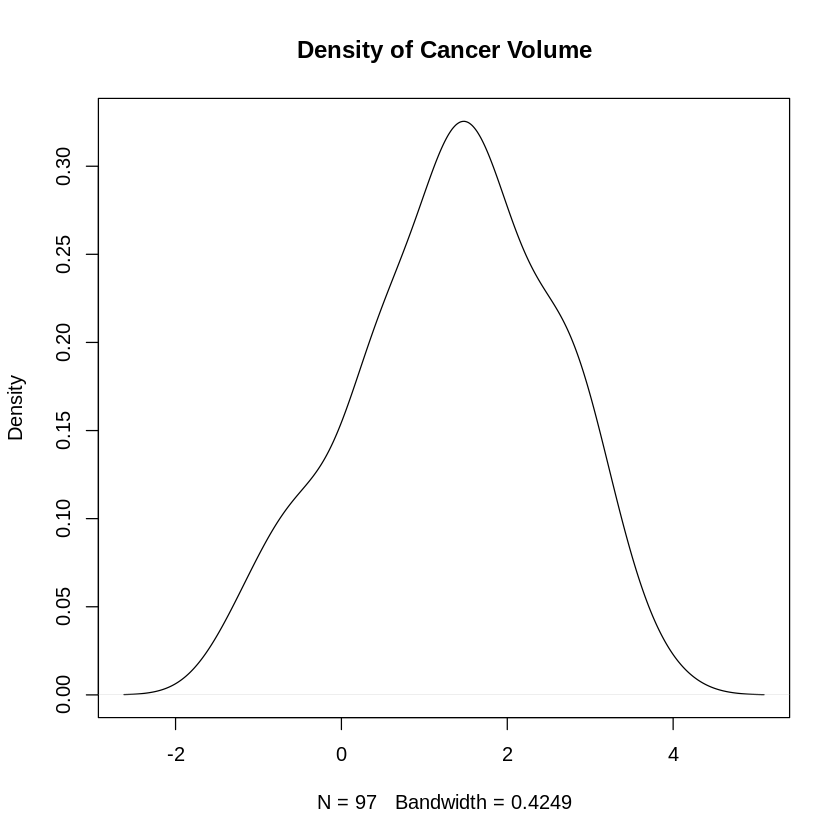

In [ ]:
plot(density(prostate$lcavol, na.rm = TRUE), main = "Density of Cancer Volume")


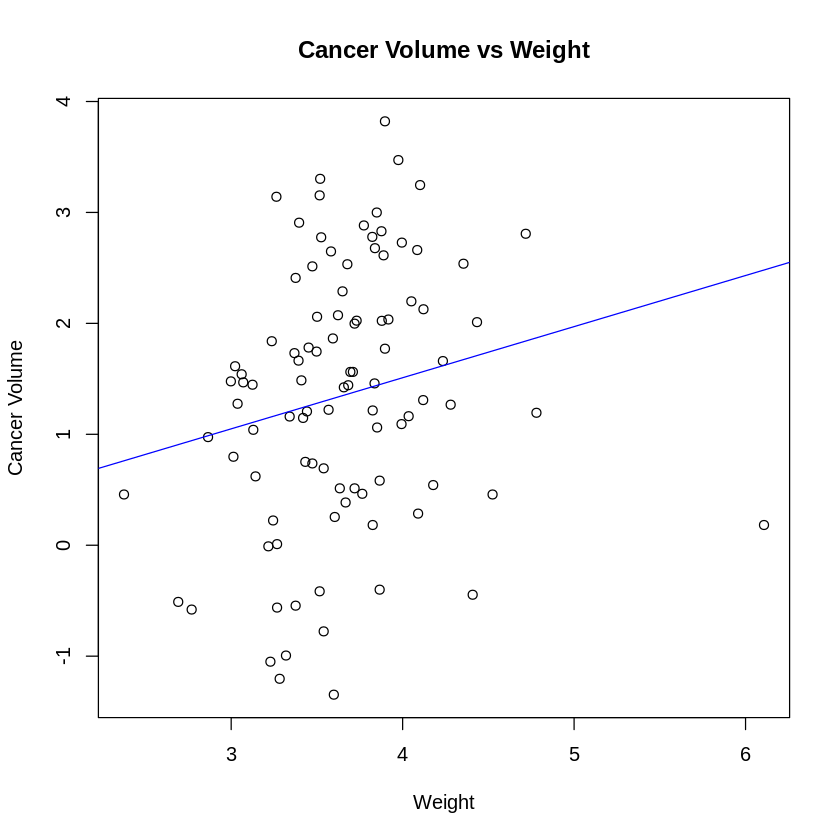

In [ ]:
plot(lcavol ~ lweight, prostate, main = "Cancer Volume vs Weight", xlab = "Weight", ylab = "Cancer Volume")
abline(lm(lcavol ~ lweight, prostate), col = "blue")


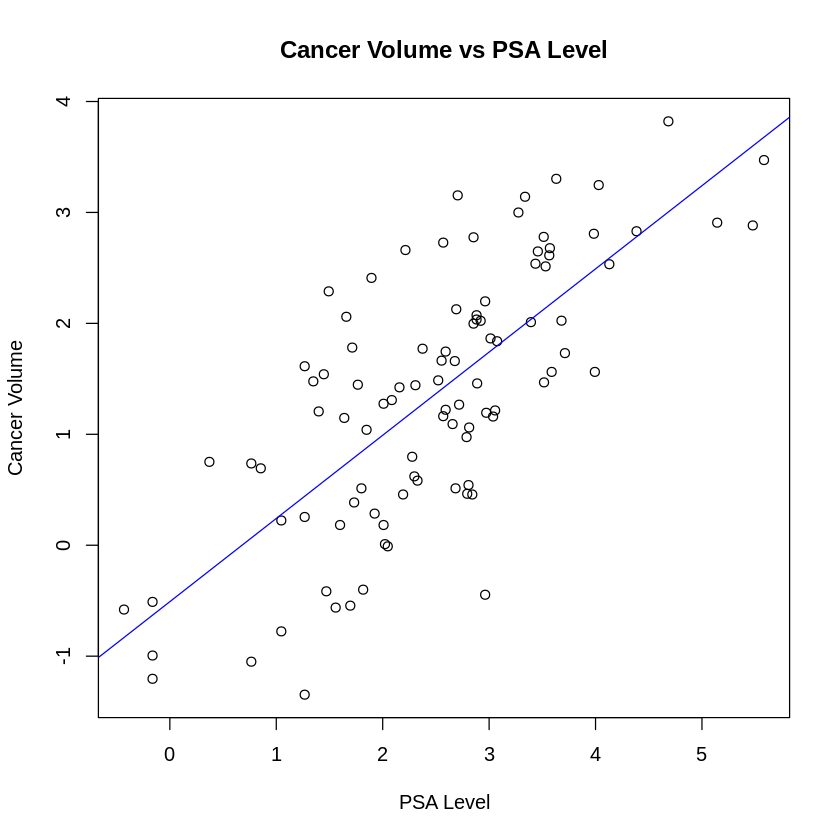

In [ ]:
plot(lcavol ~ lpsa, prostate, main = "Cancer Volume vs PSA Level", xlab = "PSA Level", ylab = "Cancer Volume")
abline(lm(lcavol ~ lpsa, prostate), col = "blue")


In [ ]:
lm_lcavol_weight <- lm(lcavol ~ lweight, data = prostate)
summary(lm_lcavol_weight)



Call:
lm(formula = lcavol ~ lweight, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.67221 -0.86607  0.07841  0.73684  2.35848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.3328     0.8804  -0.378   0.7062  
lweight       0.4607     0.2389   1.929   0.0567 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.162 on 95 degrees of freedom
Multiple R-squared:  0.03769,	Adjusted R-squared:  0.02756 
F-statistic:  3.72 on 1 and 95 DF,  p-value: 0.05674


In [ ]:
lm_lcavol_lpsa <- lm(lcavol ~ lpsa, data = prostate)
summary(lm_lcavol_lpsa)



Call:
lm(formula = lcavol ~ lpsa, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.15948 -0.59383  0.05034  0.50826  1.67751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.50858    0.19419  -2.619   0.0103 *  
lpsa         0.74992    0.07109  10.548   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8041 on 95 degrees of freedom
Multiple R-squared:  0.5394,	Adjusted R-squared:  0.5346 
F-statistic: 111.3 on 1 and 95 DF,  p-value: < 2.2e-16
